# Data Cleaning and Exploration


## Table of Contents:
1. [Important Information](http://localhost:8888/notebooks/Documents/DataSci/Outsider-Music-Linguistic-Analysis/scripts_%26_analysis/3_data_cleaning_and_exploration.ipynb#Important-Information)
2. [Unpickle the Data](http://localhost:8888/notebooks/Documents/DataSci/Outsider-Music-Linguistic-Analysis/scripts_%26_analysis/3_data_cleaning_and_exploration.ipynb#Unpickle-the-Data)    
3. [Initial Data Exploration](http://localhost:8888/notebooks/Documents/DataSci/Outsider-Music-Linguistic-Analysis/scripts_%26_analysis/3_data_cleaning_and_exploration.ipynb#Initial-Data-Exploration)    
4. [Data Cleaning](http://localhost:8888/notebooks/Documents/DataSci/Outsider-Music-Linguistic-Analysis/scripts_%26_analysis/3_data_cleaning_and_exploration.ipynb#Data-Cleaning)

## Important Information
### Prior to the Creation of this Script:
I have scraped the list of musicians from Wikipedia using wiki_musicians.py.  I manually cleaned the text file to remove double quotations ("") and parentheticals like "(performer)," "(musician)," and "(singer)," since it was manageable with just 111 artists.

I then retrieved lyrics from these artists from Genius.com using lyricsgenius_requests.ipynb, where 70+ artist-queries successfully returned JSON files.

Lastly, I created and pickled the lyrics data frame (or rough_df.pkl, not uploaded in the repo) in the [load_json_to_df.ipynb](http://localhost:8888/notebooks/Documents/DataSci/Outsider-Music-Linguistic-Analysis/scripts_%26_analysis/2_load_json_to_df.ipynb) script, where an additional 8 artists could not be successfully loaded, due to entirely null lyrical entries.  This pickled data frame remains in my local repository.

The steps above were broken into multiple scripts to avoid re-running time-intensive queries.

## Unpickle the Data

In [1]:
import pickle
f = open('../data/rough_df.pkl', 'rb')
lyricsdf = pickle.load(f)
f.close()

In [2]:
lyricsdf.head()

,artist,title,lyrics
0,Abner Jay,Bring It When You Come,Bring It When You Come Lyrics\nTerrible things...
1,Abner Jay,Cocaine,Cocaine Lyrics\nFolk music is high-class music...
2,Abner Jay,Cocaine Blues,"Cocaine Blues LyricsCocaine, Cocaine\nRunning ..."
3,Abner Jay,Don’t Mess with Me Baby,Don’t Mess with Me Baby Lyrics\nTerrible thing...
4,Abner Jay,I cried,"I cried LyricsI, I cried\nI cried in the ni-ig..."


## Initial Data Exploration
Before cleaning, I'd like to see the status of the data: 
- how many artists are there,
- how many songs,
- how many lyrics are empty strings,
- how many are duplicates,
- and what is the artist distribution like?

In [3]:
import nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
lyricsdf.describe()

,artist,title,lyrics
count,3388,3388,3388
unique,63,3359,3187
top,Wesley Willis,Lullaby,
freq,561,3,202


It looks like there are 3,388 lyric entries, with 63 unique artists. I sense there are a number of "null" lyrics, given that nearly 200 entries are not unique.  This may also be explained by duplicates (though I wouldn't expect exact duplicates for non-null lyrics).

In [5]:
# Find duplicates
len(lyricsdf[lyricsdf.lyrics == ""])

202

In [6]:
lyricsdf.lyrics.duplicated().value_counts()

False    3187
True      201
Name: lyrics, dtype: int64

201 lyric entries are duplicates of other entries, and 202 lyric entries are empty strings.

In [7]:
lyricsdf.describe()

,artist,title,lyrics
count,3388,3388,3388
unique,63,3359,3187
top,Wesley Willis,Lullaby,
freq,561,3,202


In [8]:
lyricsdf.artist.value_counts()

Wesley Willis      561
Jandek             351
Daniel Johnston    316
Viper              261
Brian Wilson       237
                  ... 
Lucia Pamela         1
Dr. Demento          1
Paul Hawkins         1
Mrs. Miller          1
Varg Vikernes        1
Name: artist, Length: 63, dtype: int64

A good portion of the data is made up of Wesley Willis music (561 songs), while it appears that many artists may only have 1 or 2 songs in the list.  Obviously, this may skew the analysis toward "Wesley Willis" music and away from the more general "Outsider Music" genre.  I will wait until my data is fully cleaned before making any judgments on how to deal with this potential skew.

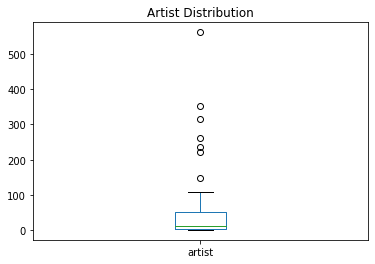

In [9]:
lyricsdf.artist.value_counts().plot(kind = "box", rot=0, title = "Artist Distribution")

This box plot is probably the cleanest way to visualize the artist distribution: there are many artists with only 1 or so songs in the data, as shown by the incredibly cramped 2nd quartile.  But there are also a handful of outliers with hundreds of songs present in the data.

## Data Cleaning

As I move forward with data cleaning, I will need to first take care of the "*Song Title* Lyrics" issue present at the beginning of most (if not all) of the lyrics in the dataset, then strip whitespace from the ends of the lyric text and handle "\n" within the lyric body.  I will also replace all empty strings "" with null values, so that they can be excluded from analysis later.  I will then take a closer look at remaining duplicates and try to weed out any non-lyrical entries.

In [10]:
# PROGRESS REPORT 2
def removeTitle(df):
    i = 0
    while i != len(df):
        row = df.iloc[i]
        toRemove = row.title + " Lyrics"
        row.lyrics = row.lyrics.lstrip(toRemove)
        i = i+1

In [11]:
removeTitle(lyricsdf)

In [12]:
lyricsdf.head()

,artist,title,lyrics
0,Abner Jay,Bring It When You Come,"\nTerrible things, always happening\nJust like..."
1,Abner Jay,Cocaine,\nFolk music is high-class music. There's a lo...
2,Abner Jay,Cocaine Blues,", Cocaine\nRunning round my heart\nAnd then ru..."
3,Abner Jay,Don’t Mess with Me Baby,\nTerrible things; that's what's getting all t...
4,Abner Jay,I cried,", I cried\nI cried in the ni-ight\nOh please c..."


Let's get rid of those 202 empty strings and replace with null vlaues.

In [13]:
lyricsdf = lyricsdf.replace("", None)

In [14]:
len(lyricsdf[lyricsdf.lyrics == ""])

0

Note below that there are still duplicates.  After removing the song titles, lyrical entries like "Transcription in progress" and "Embed" are now identical, in addition to the NaN values now present.  It is difficult to tell, however, why some of these other entries are appearing as duplicates

In [15]:
lyricsdf[lyricsdf.lyrics.duplicated()].tail(20)

,artist,title,lyrics
23,The Red Krayola,Piece for Piano and Guitar,Historic locomotion in\nSectional activation\n...
33,The Red Krayola,The Jewels of thre Madonna,Neevr let it be said that this is swill\nI'm g...
36,The Red Krayola,Tina’s Gone to Have a Baby,he master tours the garden in a coach\nI see h...
10,The Shaggs,Shaggs’ Own Thing (Musical Version),"\nOh, the rich people want what the poor peopl..."
17,The Shaggs,Wheels,"\nWhat should I do?\nTell me, tell me\nWhat sh..."
1,Tonetta,81 Inch Prime Ass (Tonetta),'m going to tickle your ass\nWith my tongue\nA...
34,Viper,Cocaine,Embed
79,Viper,"Hop It, Drop It","\nHop it, drop it\nDon't hurt it, work it\nHop..."
113,Viper,In the Life of the Top-Choice Assassin,"\nIn the life of a baller\nShot-caller, hater ..."
127,Viper,Jackers Mad,Transcription in progress by Viper Crackpostin...


In [17]:
# strip whitespace from the beginning and end
lyricsdf.lyrics = lyricsdf.lyrics.map(lambda x: x.strip("\n"))

In [18]:
lyricsdf.head()

,artist,title,lyrics
0,Abner Jay,Bring It When You Come,"Terrible things, always happening\nJust like y..."
1,Abner Jay,Cocaine,Folk music is high-class music. There's a lott...
2,Abner Jay,Cocaine Blues,", Cocaine\nRunning round my heart\nAnd then ru..."
3,Abner Jay,Don’t Mess with Me Baby,Terrible things; that's what's getting all the...
4,Abner Jay,I cried,", I cried\nI cried in the ni-ight\nOh please c..."


In [43]:
test = lyricsdf.sample(1)

In [44]:
test

,index,artist,title,lyrics
2460,42,Viper,Death 2 Snitches,Mark may do talking on me but he don't know me...


In [48]:
lyricsdf.loc[46]

level_0                                                   46
index                                                     23
artist                                            Ariel Pink
title                                           Death Patrol
lyrics     Come on the streets the death patrol\nTaking d...
Name: 46, dtype: object

In [47]:
lyricsdf = lyricsdf.reset_index()
lyricsdf = lyricsdf[[artist, title, lyrics]]

ValueError: cannot insert level_0, already exists

In [39]:
lyricsdf = l

,index,artist,title,lyrics
0,0,Abner Jay,Bring It When You Come,"Terrible things, always happening\nJust like y..."
1,1,Abner Jay,Cocaine,Folk music is high-class music. There's a lott...
2,2,Abner Jay,Cocaine Blues,", Cocaine\nRunning round my heart\nAnd then ru..."
3,3,Abner Jay,Don’t Mess with Me Baby,Terrible things; that's what's getting all the...
4,4,Abner Jay,I cried,", I cried\nI cried in the ni-ight\nOh please c..."
...,...,...,...,...
3383,45,William Shatner,Together,He says Phoenix\nPegasus\nGrecian urn\nMidwest...
3384,46,William Shatner,Twilight Zone,(Somewhere in a lonely hotel room\nThere's a g...
3385,47,William Shatner,Walking on the Moon,Giant steps are what you take\nI hope my legs ...
3386,48,William Shatner,What Have You Done,She was underwater\nIn the shadows\nWas it the...
